In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# PRE PROCESSING AND T_T Split (Same as Library Implementation)

In [2]:
df = pd.read_csv(r"housepricedata.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [3]:
data = df.values
data #Array

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [4]:
X = data[:,0:10]
Y = data[:,10]

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [6]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5) #50% of the DataSet
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


Activation Function: Sigmoid Function - idea is to scale into values ranging from 0-1

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))  

In [8]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x)) #Derivative

Note :

Shape of our manual input (X) will be - (1,10)
Shape of our output (Y) will be - (1,)


In [9]:
#Weights and Bias

bias = -0.5
lr = 0.3
weights = np.array([10000.0,5.0,5.0,1000.0,1.0,0.0,2.0,6.0,1.0,500.0])
weights.shape

(10,)

In [12]:
error_a = []

for i in range (1022):
    inputs = X_train
    in_o = np.dot(inputs,weights)+bias
    out_o = sigmoid(in_o)
    error = out_o - Y_train
    x = error.sum()
    error_a.append(x)
    print(x)
    
    derror_douto = error
    dout_din = sigmoid_der(out_o)
    
    deriv = derror_douto * dout_din
    
    inputs = X_train.T
    deriv_final = np.dot(inputs,deriv)
    
    
    weights -= lr * deriv_final
    
    #updating bias weight
    
    for i in deriv:
        bias -= lr * i


511.0
511.0
509.9994445982849
506.599855724706
490.1196328597923
473.5798956001079
444.1628050754987
416.2518530464473
372.13585463091454
316.1204268735488
269.16250439004256
202.74259530340836
174.85470410981668
142.6858896668175
117.76145818363271
103.08644102988828
91.7986415859715
83.07398465197468
78.07944817286273
73.6779985593949
70.29606822092143
68.11050258229164
67.12437848785473
66.16378793925129
65.16615453236736
64.41234984052046
63.8914653879843
63.43855802345959
62.80191429843131
61.93903033055857
60.99723022069297
60.07684293385144
59.224443000091654
58.42068071881905
57.73700619664503
57.363970974901214
57.520294204512666
57.82545683389666
57.97969000652302
58.0781806867744
58.25052893720496
58.53685450898079
58.813473855383265
59.06929546624464
59.18792756390144
59.090785557809525
58.7833509916872
58.29471504547267
57.68341514038128
57.00423370964972
56.34212193049355
55.793216682238224
55.438322779179785
55.513351632842095
55.93085551176152
56.214576994912036
56.2389

22.79474071708548
22.779860631987205
22.765606276383398
22.7521107205858
22.73949444206977
22.72786203455441
22.717299671470492
22.707873379883832
22.699628106397846
22.692587494324357
22.686754247305238
22.68211093059572
22.678621056175913
22.676230308424586
22.67486778912499
22.674447190043693
22.674867835096464
22.676015570155002
22.677763515845637
22.67997273679812
22.68249291930157
22.68516318681929
22.687813216389827
22.690264843339648
22.692334349586552
22.69383561313473
22.69458424449514
22.694402744165984
22.693126584581705
22.690610960160104
22.68673778044407
22.681422333492925
22.674618953067714
22.666325014435596
22.656582678133216
22.645477998483543
22.633137291222077
22.619720969858392
22.60541535919408
22.590423223490475
22.57495386592303
22.55921364872028
22.543397659518853
22.527683041735727
22.512224260519204
22.49715033712262
22.48256388900606
22.468541680545542
22.455136323171143
22.44237875496529
22.430281162331077
22.418840063147677
22.408039337007033
22.397853053

In [51]:
#Current value of weights and bias

print(weights)
print(bias)


[9789.59667814  430.87443983 -129.68034691  743.57409405  445.23978599
  172.48498741 -401.06008688 -161.09700868   88.7266058   146.90407877]
-769.2418845119062


In [52]:
#Accuracy

print(100-x, "is the accuracy of the model(training) for the given weights")

80.24392038794834 is the accuracy of the model(training) for the given weights


# Testing

In [16]:
inputs = X_test
in_o = np.dot(inputs,weights)+bias
out_o = sigmoid(in_o)
error = out_o - Y_test
#print(error)
x = error.sum()
print(100-abs(x),"Is The Model Accuracy")
    

[ 0.00000000e+000  3.44180200e-117  0.00000000e+000  0.00000000e+000
  0.00000000e+000 -1.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  1.07499249e-092  2.60071259e-074  2.53213458e-137
  2.65168206e-078  3.37830523e-119  1.12514306e-223  1.09591935e-110
  0.00000000e+000  1.64776719e-061  0.00000000e+000  4.39439212e-005
  0.00000000e+000  9.18351768e-084  3.39592554e-112  0.00000000e+000
  5.14483018e-166  0.00000000e+000  2.60713290e-088  7.91867624e-110
  1.00000000e+000  1.08733360e-097  8.97088580e-086  1.00000000e+000
  5.03547897e-220  2.64508568e-103  0.00000000e+000  0.00000000e+000
  2.81376392e-245  0.00000000e+000  2.46911063e-051  3.28153375e-058
  0.00000000e+000  0.00000000e+000  0.00000000e+000 -1.00000000e+000
  1.06262999e-126  3.21416751e-131  0.00000000e+000  5.64916708e-203
  5.88368921e-074  2.53239175e-155  0.00000000e+000  6.21791097e-126
  0.00000000e+000  4.56780251e-158  1.26986705e-103  0.00000000e+000
  1.40114944e-024  0.00000000e+000

# Descent Visualization



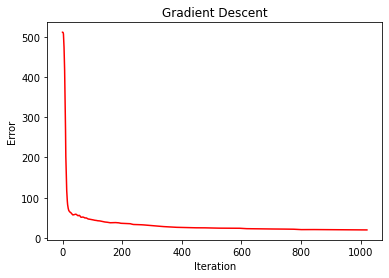

In [21]:
import matplotlib.pyplot as plt

plt.plot(error_a,color = "red")
plt.ylabel("Error")
plt.xlabel("Iteration")
plt.title("Gradient Descent")
plt.show()